# WorldFloods Database
[Tutorial here](http://trilliumtechnologies.net/ml4floods/content/prep/full_data_ingest.html)

In [1]:
import sys
import os

from ml4floods.data.copernicusEMS import activations
from ml4floods.data import utils
from pathlib import Path

In [2]:
table_activations_ems = activations.table_floods_ems(event_start_date="2021-01-01")
table_activations_ems

,Title,CodeDate,Type,Country
Code,,,,
EMSR639,Flood in Belize,2022-11-02,Flood,Belize
EMSR637,Floods in Australia,2022-10-12,Flood,Australia
EMSR636,Typhoon Noru in Philippines,2022-09-25,Storm,Philippines
EMSR635,Hurricane Fiona in Canada,2022-09-24,Storm,Canada
EMSR634,"Flood in Marche and Umbria Regions, Italy",2022-09-15,Flood,Italy
EMSR631,Flood in Pakistan,2022-09-10,Flood,Pakistan
EMSR629,Floods in Pakistan,2022-08-25,Flood,Pakistan
EMSR586,"Flood in New South Wales, Australia",2022-07-03,Flood,Australia
EMSR577,Floods in Suriname,2022-03-07,Flood,Suriname


In [3]:
emsr_code = "EMSR495"
zip_files_activation_url_list = activations.fetch_zip_file_urls(emsr_code)
zip_files_activation_url_list

['https://emergency.copernicus.eu/mapping/download/184409/EMSR495_AOI04_GRA_PRODUCT_r1_VECTORS_v1_vector.zip',
 'https://emergency.copernicus.eu/mapping/download/184406/EMSR495_AOI01_DEL_MONIT03_r1_VECTORS_v1_vector.zip',
 'https://emergency.copernicus.eu/mapping/download/184373/EMSR495_AOI01_DEL_MONIT02_r1_VECTORS_v1_vector.zip',
 'https://emergency.copernicus.eu/mapping/download/184360/EMSR495_AOI01_DEL_MONIT01_r1_VECTORS_v1_vector.zip',
 'https://emergency.copernicus.eu/mapping/download/184343/EMSR495_AOI01_DEL_PRODUCT_r1_VECTORS_v1_vector.zip',
 'https://emergency.copernicus.eu/mapping/download/184347/EMSR495_AOI02_DEL_PRODUCT_r1_VECTORS_v1_vector.zip']

In [4]:
from tqdm import tqdm
import os
folder_out = f"Copernicus_EMS_raw"
os.makedirs(folder_out, exist_ok=True)

unzip_files_activation = []
for zip_file in tqdm(zip_files_activation_url_list):
    local_zip_file = activations.download_vector_cems(zip_file, 
                                                      folder_out=folder_out)
    unzipped_file = activations.unzip_copernicus_ems(local_zip_file,
                                                     folder_out=folder_out)
    unzip_files_activation.append(unzipped_file)

100%|█████████████████████████████████████████████| 6/6 [00:52<00:00,  8.81s/it]


In [5]:
# folder_out=f"Copernicus_EMS_raw/{activation}"

code_date = table_activations_ems.loc[emsr_code]["CodeDate"]

registers = []
for unzip_folder in unzip_files_activation:
    metadata_floodmap = activations.filter_register_copernicusems(unzip_folder, code_date)
    if metadata_floodmap is not None:
        floodmap = activations.generate_floodmap(metadata_floodmap, folder_files=unzip_folder)
        registers.append({"metadata_floodmap": metadata_floodmap, "floodmap": floodmap})
        print(f"File {unzip_folder} processed correctly")
    else:
        print(f"File {unzip_folder} does not follow the expected format. It won't be processed")

File Copernicus_EMS_raw/EMSR495_AOI04_GRA_PRODUCT_r1_VECTORS_v1_vector processed correctly


/Users/alison/opt/miniconda3/lib/python3.9/site-packages/geopandas/geodataframe.py:1443: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


File Copernicus_EMS_raw/EMSR495_AOI01_DEL_MONIT03_r1_VECTORS_v1_vector processed correctly


/Users/alison/opt/miniconda3/lib/python3.9/site-packages/geopandas/geodataframe.py:1443: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


File Copernicus_EMS_raw/EMSR495_AOI01_DEL_MONIT02_r1_VECTORS_v1_vector processed correctly
Multiple event types within shapefile ['Coastal flood' 'Riverine flood']


/Users/alison/opt/miniconda3/lib/python3.9/site-packages/geopandas/geodataframe.py:1443: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


File Copernicus_EMS_raw/EMSR495_AOI01_DEL_MONIT01_r1_VECTORS_v1_vector processed correctly


/Users/alison/opt/miniconda3/lib/python3.9/site-packages/geopandas/geodataframe.py:1443: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


File Copernicus_EMS_raw/EMSR495_AOI01_DEL_PRODUCT_r1_VECTORS_v1_vector processed correctly
File Copernicus_EMS_raw/EMSR495_AOI02_DEL_PRODUCT_r1_VECTORS_v1_vector processed correctly


In [17]:
[register['metadata_floodmap']['event type'] for register in registers]

['Riverine flood',
 'Riverine flood',
 'Riverine flood',
 'Coastal flood',
 'Coastal flood',
 'Flash flood']

In [20]:
i = 3  # 3 and 4 are coastal floods
floodmap = registers[3]['floodmap']
metadata_floodmap = registers[3]['metadata_floodmap']

In [23]:
import numpy as np
np.unique(floodmap.source)

array(['area_of_interest', 'flood', 'hydro', 'hydro_l'], dtype=object)

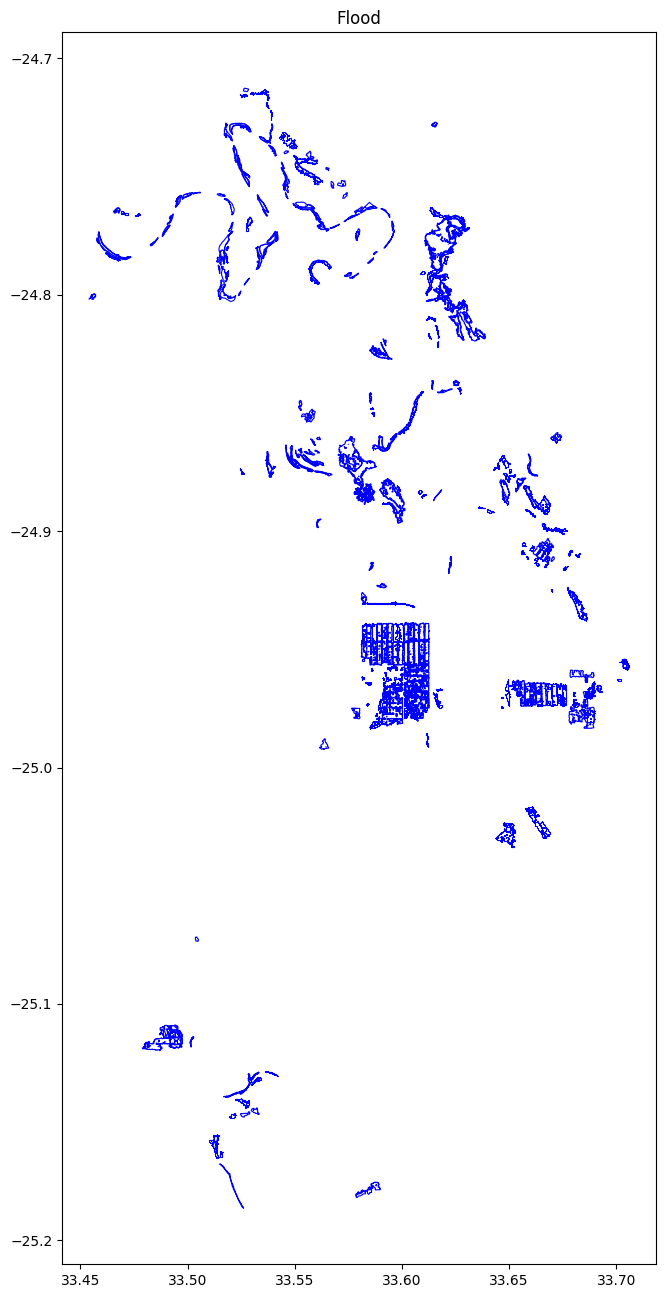

In [24]:
import matplotlib.pyplot as plt
# initialize figure
fig, ax = plt.subplots(figsize=(16,16))
floodmap[floodmap["source"] == "flood"].plot(ax=ax, facecolor="None", edgecolor="blue", label="Flood Maps", linewidth=0.8)
ax.set(
    title="Flood"
)
plt.show()

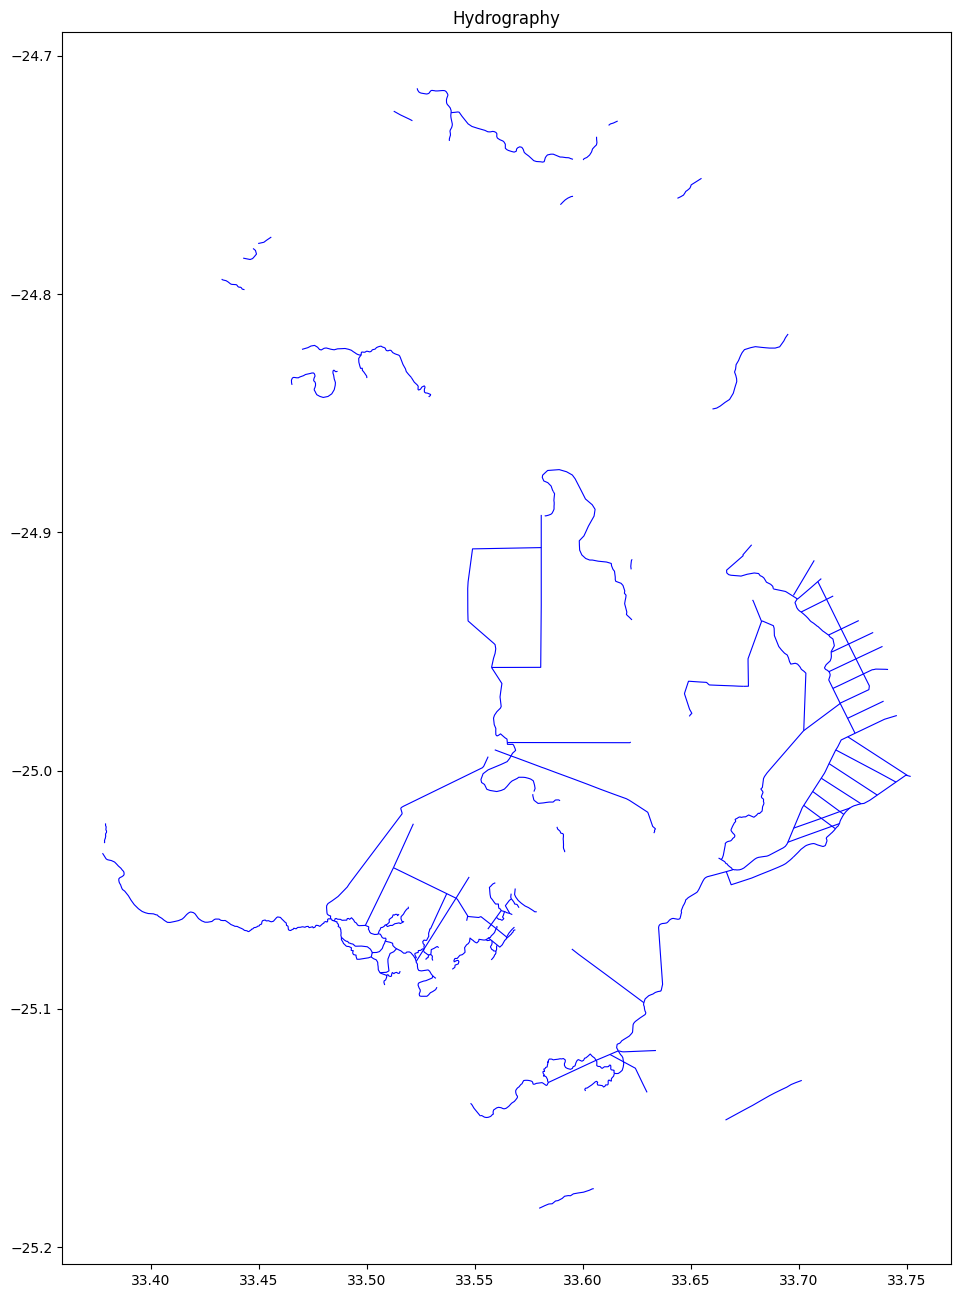

In [25]:
import matplotlib.pyplot as plt
# initialize figure
fig, ax = plt.subplots(figsize=(16,16))
floodmap[floodmap["source"] == "hydro_l"].plot(ax=ax, facecolor="None", edgecolor="blue", label="Flood Maps", linewidth=0.8)
ax.set(
    title="Hydrography"
)
plt.show()

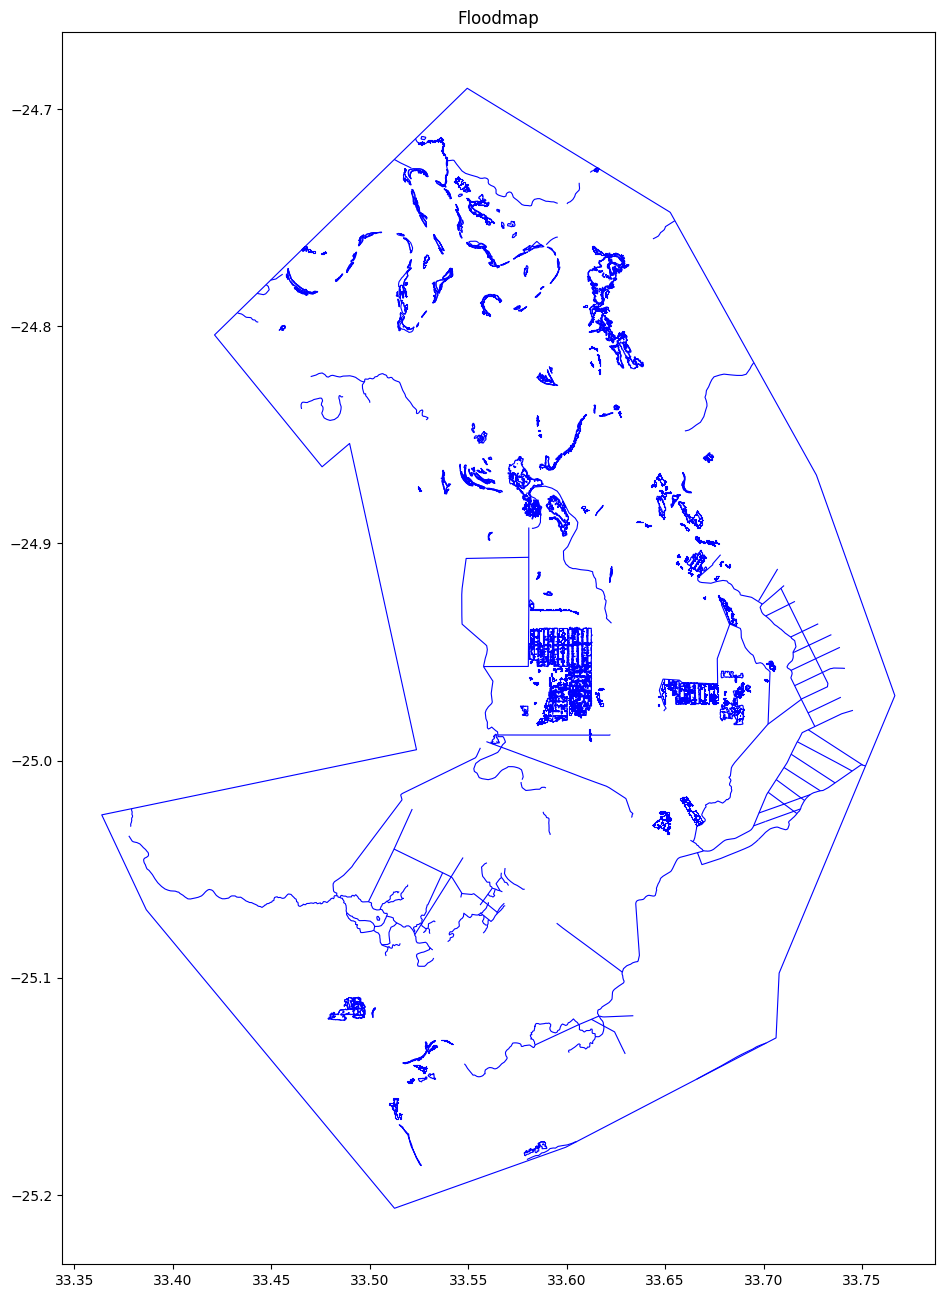

In [26]:
import matplotlib.pyplot as plt
# initialize figure
fig, ax = plt.subplots(figsize=(16,16))
floodmap[floodmap["source"] != "hydro"].plot(ax=ax, facecolor="None", edgecolor="blue", label="Flood Maps", linewidth=0.8)
ax.set(
    title="Floodmap"
)
plt.show()

In [33]:
from datetime import timedelta
from datetime import datetime
import geopandas as gpd
import pandas as pd
import ee
import geemap.eefolium as geemap
import folium
from ml4floods.data import ee_download, create_gt
from shapely.geometry import mapping

In [34]:
!earthengine authenticate

Fetching credentials using gcloud
Traceback (most recent call last):
  File "/Users/alison/opt/miniconda3/lib/python3.9/site-packages/ee/oauth.py", line 291, in _load_app_default_credentials
    subprocess.run(command, check=True)
  File "/Users/alison/opt/miniconda3/lib/python3.9/subprocess.py", line 505, in run
    with Popen(*popenargs, **kwargs) as process:
  File "/Users/alison/opt/miniconda3/lib/python3.9/subprocess.py", line 951, in __init__
    self._execute_child(args, executable, preexec_fn, close_fds,
  File "/Users/alison/opt/miniconda3/lib/python3.9/subprocess.py", line 1821, in _execute_child
    raise child_exception_type(errno_num, err_msg, err_filename)
FileNotFoundError: [Errno 2] No such file or directory: 'gcloud'

The above exception was the direct cause of the following exception:

Traceback (most recent call last):
  File "/Users/alison/opt/miniconda3/bin/earthengine", line 8, in <module>
    sys.exit(main())
  File "/Users/alison/opt/miniconda3/lib/python3.9/sit

In [30]:
ee.Initialize()

bounds_pol = activations.generate_polygon(metadata_floodmap["area_of_interest_polygon"].bounds)
pol_2_clip = ee.Geometry.Polygon(bounds_pol)

pol = ee.Geometry(mapping(metadata_floodmap["area_of_interest_polygon"]))

date_event = datetime.utcfromtimestamp(metadata_floodmap["satellite date"].timestamp())

date_end_search = date_event + timedelta(days=20)

# Grab the S2 images and the Permanent water image
img_col = ee_download.get_s2_collection(date_event, date_end_search, pol)
permanent_water_img = ee_download.permanent_water_image(date_event.year, pol_2_clip)


# Get info of the Image Collection (convert to table)
img_col_info = ee_download.img_collection_to_feature_collection(img_col,
                                                               ["system:time_start", "valids", "cloud_probability"])
img_col_info_local = gpd.GeoDataFrame.from_features(img_col_info.getInfo())
img_col_info_local["system:time_start"] = img_col_info_local["system:time_start"].apply(lambda x: datetime.utcfromtimestamp(x/1000))

n_images_col = img_col_info_local.shape[0]
print(f"Found {n_images_col} S2 images between {date_event.isoformat()} and {date_end_search.isoformat()}")

# Plot images using geemap
Map = geemap.Map()

imgs_list = img_col.toList(n_images_col, 0)
for i in range(n_images_col):
    img_show = ee.Image(imgs_list.get(i))
    Map.addLayer(img_show.clip(pol), 
                 {"min":0, "max":3000, 
                  "bands":["B4","B3","B2"]},
                 f"({i}/{n_images_col}) S2 RGB {img_col_info_local['system:time_start'][i].strftime('%Y-%m-%d')}", 
                 False)
    Map.addLayer(img_show.clip(pol), 
                 {"min":0, "max":3000, 
                  "bands":["B11","B8","B4"]},
                 f"({i}/{n_images_col}) S2 SWIR/NIR/RED {img_col_info_local['system:time_start'][i].strftime('%Y-%m-%d')}", 
                 True)

# Viz permanent water layer
visualization = {
  "bands": ['waterClass'],
  "min": 0.0,
  "max": 3.0,
  "palette": ['cccccc', 'ffffff', '99d9ea', '0000ff']
}

Map.addLayer(permanent_water_img, visualization, name="JRC Permanent water")


floodmap_folium = folium.features.GeoJson(floodmap, name="FloodMap")
Map.add_child(floodmap_folium,name="FloodMap")

# Map.addLayer(pol, {"color": 'FF000000'}, "AoI")

Map.centerObject(pol, zoom=10)
folium.LayerControl(collapsed=False).add_to(Map)
Map

EEException: Please authorize access to your Earth Engine account by running

earthengine authenticate

in your command line, and then retry.